
# Coffee Data Analysis and Modeling
This notebook explores and analyzes coffee production data. It includes data cleaning, exploratory data analysis (EDA), feature engineering, and machine learning model building to predict domestic coffee consumption.
    

In [31]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
#loading the data
data_path = "C:\\Users\\HP\\Desktop\\coffee folder\\coffeedata.csv"
df = pd.read_csv(data_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               1920 non-null   object 
 1   Year                  1920 non-null   int64  
 2   Production            1920 non-null   float64
 3   Exports               1920 non-null   float64
 4   Domestic_consumption  1920 non-null   float64
 5   Gross_opening_stocks  1920 non-null   float64
 6   Imports               0 non-null      float64
 7   Re_exports            0 non-null      float64
 8   Price_retail          0 non-null      float64
 9   Consumption           0 non-null      float64
 10  Coffee_type           1920 non-null   object 
 11  Price_grower          1173 non-null   float64
 12  Country_code          1710 non-null   object 
 13  Latitude              1710 non-null   float64
 14  Longitude             1710 non-null   float64
dtypes: float64(11), int64


Outliers can distort the model's performance and lead to biased predictions. The boxplot highlights values that fall beyond 1.5 times the interquartile range (IQR). 


# Data Cleaning
We clean the dataset by:
1. Handling missing values.
2. Dropping unnecessary columns.
3. Dealing with outliers using the IQR method.
    

In [33]:
# Check for missing values
print(df.isnull().sum())



Country                    0
Year                       0
Production                 0
Exports                    0
Domestic_consumption       0
Gross_opening_stocks       0
Imports                 1920
Re_exports              1920
Price_retail            1920
Consumption             1920
Coffee_type                0
Price_grower             747
Country_code             210
Latitude                 210
Longitude                210
dtype: int64


In [34]:
df.drop(columns=['Imports', 'Re_exports', 'Price_retail', 'Consumption','Country_code'], inplace=True)


In [35]:
df.head()

,Country,Year,Production,Exports,Domestic_consumption,Gross_opening_stocks,Coffee_type,Price_grower,Latitude,Longitude
0,Angola,1990,50.3450,84.3500,20.0,210.0,Brazilan Naturals,NaN,-11.202692,17.873887
1,Angola,1990,50.3450,84.3500,20.0,210.0,Robustas,85.6569,-11.202692,17.873887
2,Bolivia (Plurinational State of),1990,122.7770,156.4420,25.0,54.0,Other Milds,51.7802,NaN,NaN
3,Brazil,1990,27285.6286,16935.7876,8200.0,26926.0,Brazilan Naturals,54.3248,-14.235004,-51.925280
4,Brazil,1990,27285.6286,16935.7876,8200.0,26926.0,Robustas,34.8486,-14.235004,-51.925280


In [36]:
print(df.isnull().sum())


Country                   0
Year                      0
Production                0
Exports                   0
Domestic_consumption      0
Gross_opening_stocks      0
Coffee_type               0
Price_grower            747
Latitude                210
Longitude               210
dtype: int64


<Axes: >

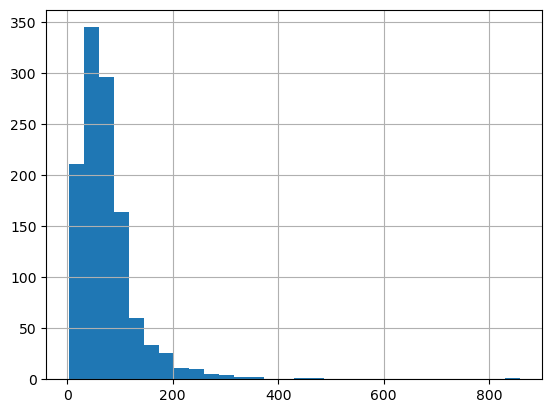

In [37]:
df['Price_grower'].hist(bins=30)


In [38]:
df['Price_grower'].fillna(df['Price_grower'].median(), inplace=True)


In [39]:
print(df['Latitude'].isna().sum())  # Checking for null values 
print(df['Longitude'].isna().sum())


210
210


In [40]:

# Creating a lookup dictionary for country coordinates
country_coords = {
    "Bolivia (Plurinational State of)": {"Latitude": -16.2902, "Longitude": -63.5887},
    "Congo": {"Latitude": -0.228, "Longitude": 15.8277},
    "Democratic Republic of Congo": {"Latitude": -4.0383, "Longitude": 21.7587},
    "Trinidad & Tobago": {"Latitude": 10.6918, "Longitude": -61.2225},
    "Viet Nam": {"Latitude": 14.0583, "Longitude": 108.2772}
}

# Filling missing latitude and longitude using the lookup table
def fill_missing_coords(row):
    if pd.isna(row['Latitude']) or pd.isna(row['Longitude']):
        country = row['Country']
        if country in country_coords:
            row['Latitude'] = country_coords[country]['Latitude']
            row['Longitude'] = country_coords[country]['Longitude']
    return row

# Applying the function
df = df.apply(fill_missing_coords, axis=1)





# Summary Statistics
These summary statistics provide insights into the central tendency and variability of the dataset. For example, a high standard deviation in `Production` suggests significant variability in coffee production across different regions or time periods.
    


# Exploratory Data Analysis (EDA)
## Summary Statistics
We examine summary statistics for numerical and categorical variables.

## Data Visualizations
Visualizations are used to uncover trends and patterns, including:
- Histograms
- Boxplots
- Scatter plots
- Correlation heatmaps
    

In [41]:
df.head()

,Country,Year,Production,Exports,Domestic_consumption,Gross_opening_stocks,Coffee_type,Price_grower,Latitude,Longitude
0,Angola,1990,50.3450,84.3500,20.0,210.0,Brazilan Naturals,62.3690,-11.202692,17.873887
1,Angola,1990,50.3450,84.3500,20.0,210.0,Robustas,85.6569,-11.202692,17.873887
2,Bolivia (Plurinational State of),1990,122.7770,156.4420,25.0,54.0,Other Milds,51.7802,-16.290200,-63.588700
3,Brazil,1990,27285.6286,16935.7876,8200.0,26926.0,Brazilan Naturals,54.3248,-14.235004,-51.925280
4,Brazil,1990,27285.6286,16935.7876,8200.0,26926.0,Robustas,34.8486,-14.235004,-51.925280



# Output: Correlation Heatmap
The correlation heatmap identifies relationships between variables. High positive correlations (close to 1) suggest strong direct relationships, while high negative correlations (close to -1) suggest inverse relationships. These insights guide feature selection for modeling.
    

In [42]:
print(df.isnull().sum())


Country                 0
Year                    0
Production              0
Exports                 0
Domestic_consumption    0
Gross_opening_stocks    0
Coffee_type             0
Price_grower            0
Latitude                0
Longitude               0
dtype: int64



### Scatter Plots
Scatter plots visually depict relationships between variables. For example, a strong linear relationship between `Production` and `Consumption` could indicate that higher production directly impacts domestic consumption.
    

# 1.Check data types

In [43]:
# Checking data types
print(df.dtypes)

# Converting data types 
df['Year'] = df['Year'].astype(int)  # Ensure 'Year' is an integer
df['Coffee_type'] = df['Coffee_type'].astype('category')  # If categorical


Country                  object
Year                      int64
Production              float64
Exports                 float64
Domestic_consumption    float64
Gross_opening_stocks    float64
Coffee_type              object
Price_grower            float64
Latitude                float64
Longitude               float64
dtype: object


# 2. EDA

## a.Summary Statistics


In [44]:
# Summary statistics for numerical columns
print(df.describe())

# Summary for categorical columns
print(df['Coffee_type'].value_counts())


              Year    Production       Exports  Domestic_consumption  \
count  1920.000000   1920.000000   1920.000000           1920.000000   
mean   2004.500000   3213.906711   2382.238627            899.519576   
std       8.657696   8221.633741   5582.283591           2840.622700   
min    1990.000000      0.000000      0.000000              0.000000   
25%    1997.000000    103.220250     36.788958             13.900000   
50%    2004.500000    641.039100    406.413764            149.500000   
75%    2012.000000   2382.049750   1980.263750            390.000000   
max    2019.000000  65130.799700  40697.863709          22200.000000   

       Gross_opening_stocks  Price_grower     Latitude    Longitude  
count           1920.000000   1920.000000  1920.000000  1920.000000  
mean            1013.801560     69.702714     3.510668     9.266768  
std             4410.614307     45.597876    11.205901    68.427428  
min                0.000000      2.957300   -19.015438  -102.552784  
2

## b. Data Visualization


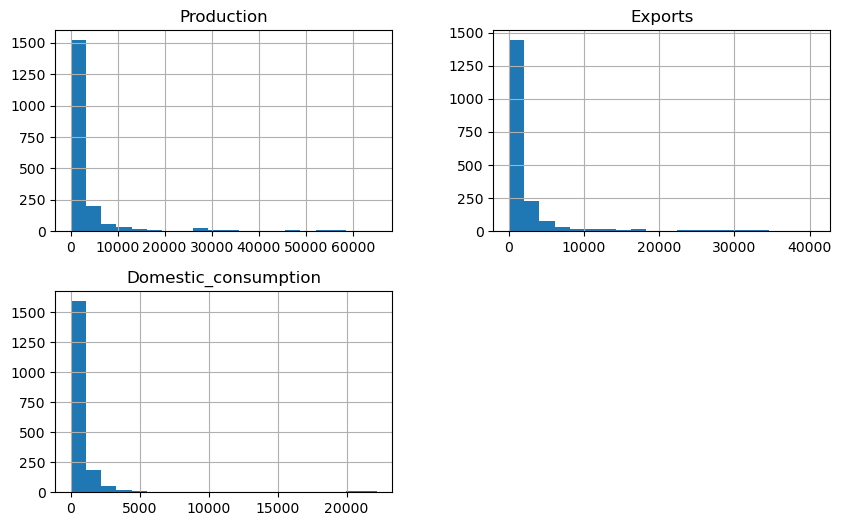

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for numeric columns
df[['Production', 'Exports', 'Domestic_consumption']].hist(bins=20, figsize=(10, 6))
plt.xlabel('Production')
plt.show()



### New Features
The new features, such as `Production_to_Consumption_Ratio`, capture underlying relationships that may enhance the model's ability to predict domestic consumption. These engineered features are especially useful for addressing non-linear patterns in the data.
    

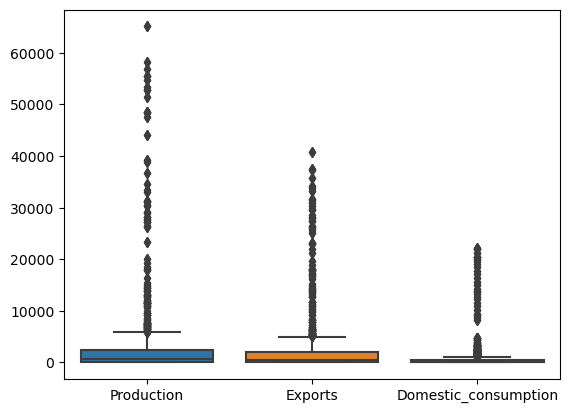

In [46]:
# Boxplot to check for outliers
sns.boxplot(data=df[['Production', 'Exports', 'Domestic_consumption']])
plt.show()




### Distribution of Features
The distribution of new features is analyzed to ensure they are meaningful and well-behaved (e.g., avoiding extreme skewness or multicollinearity). This step confirms their validity before using them in the model.
    

In [47]:

# Defining function to remove outliers using the IQR method
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Selecting the columns to process
columns_to_clean = ['Production', 'Exports', 'Domestic_consumption']

# Removing outliers
df_cleaned = remove_outliers_iqr(df, columns_to_clean)

# Printing results
print("Original data shape:", df.shape)
print("Cleaned data shape:", df_cleaned.shape)



Original data shape: (1920, 10)
Cleaned data shape: (1376, 10)


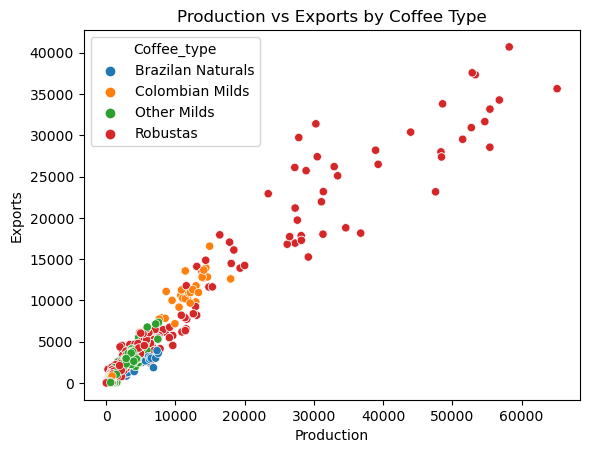

In [48]:
# Scatter plot: Production vs Exports
sns.scatterplot(data=df, x='Production', y='Exports', hue='Coffee_type')
plt.title('Production vs Exports by Coffee Type')
plt.show()



## Baseline Model (Linear Regression)
The baseline Linear Regression model provides a point of reference for future comparisons. The R² score indicates the proportion of variance explained by the model, while MSE highlights the average squared error. These metrics will help evaluate improvements from more complex models.
    

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be chan

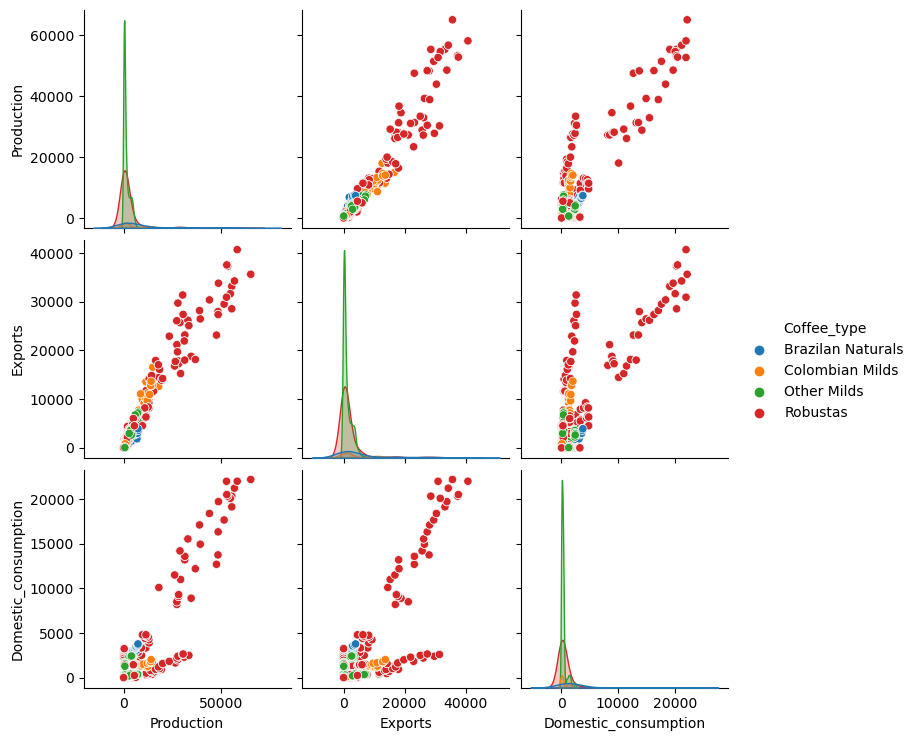

In [49]:
sns.pairplot(df, vars=['Production', 'Exports', 'Domestic_consumption'], hue='Coffee_type')
plt.show()



## Random Forest Model
The Random Forest model outperforms the baseline by capturing non-linear relationships. The feature importance plot reveals which features contribute most to the predictions, guiding data scientists to focus on the most relevant variables.
    


# Feature Engineering
New features are created to capture meaningful relationships:
1. **Production_to_Consumption_Ratio**: Ratio of coffee production to domestic consumption.
2. **Exports_to_Production_Ratio**: Ratio of exports to production.
    

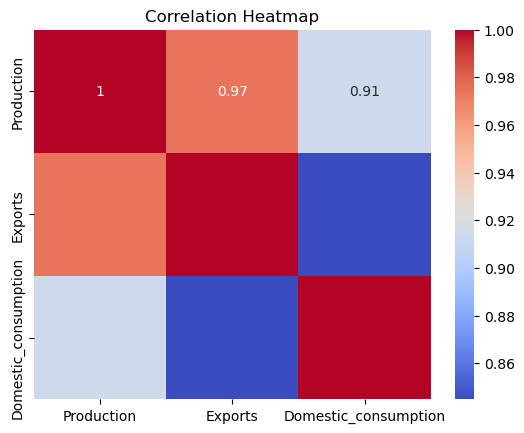

In [50]:
correlation_matrix = df[['Production', 'Exports', 'Domestic_consumption']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Correlation Heatmap

The heatmap visualizes the correlation between three variables: **Production**, **Exports**, and **Domestic Consumption**. 

- The values range from 0 to 1, where:
  - **1** indicates a perfect positive correlation.
  - **0** indicates no correlation.
  
- Observations from the heatmap:
  - **Production** and **Exports** have a high correlation of **0.97**, suggesting that an increase in production is closely associated with an increase in exports.
  - **Production** and **Domestic Consumption** show a slightly lower correlation of **0.91**, indicating that production also contributes significantly to domestic consumption but less strongly than exports.
  - **Exports** and **Domestic Consumption** are less correlated compared to the others, as shown by their slightly lower value on the heatmap.

The color gradient on the right provides a visual representation of correlation strength, with darker shades of red indicating higher correlations.



## Hyperparameter Tuning
GridSearchCV identified the optimal hyperparameters for the Random Forest model, such as the number of estimators or maximum depth. This optimization step ensures the model is neither underfitted nor overfitted.
    

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


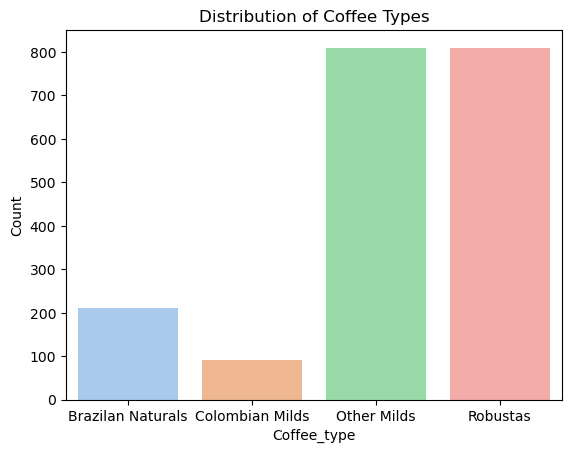

In [51]:
sns.countplot(data=df, x='Coffee_type', palette='pastel')
plt.title('Distribution of Coffee Types')
plt.ylabel('Count')
plt.show()


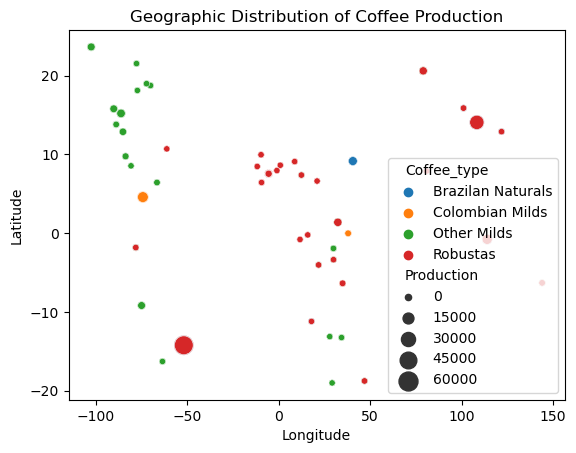

In [52]:
sns.scatterplot(data=df, x='Longitude', y='Latitude', size='Production', hue='Coffee_type', sizes=(20, 200))
plt.title('Geographic Distribution of Coffee Production')
plt.show()



## Feature Importance
Feature importance scores help identify the most influential variables in the model. This understanding can guide domain experts in focusing on key factors, such as the role of production ratios in predicting consumption trends.
    

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


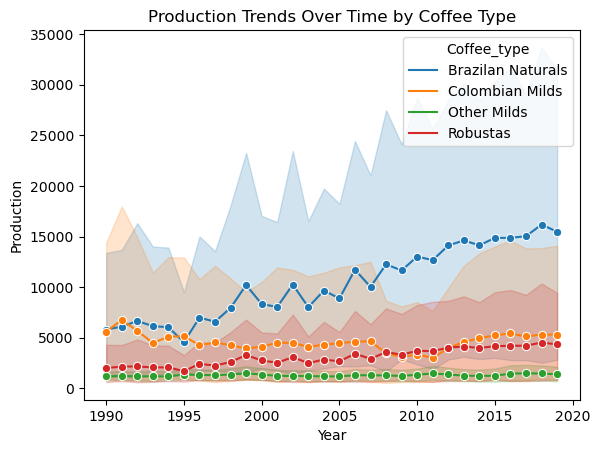

In [53]:
sns.lineplot(data=df, x='Year', y='Production', hue='Coffee_type', marker='o')
plt.title('Production Trends Over Time by Coffee Type')
plt.show()



## Model Deployment
The trained model is saved using `joblib` for future deployment. This allows the model to be loaded and used for predictions without retraining, ensuring efficiency and reproducibility.
    


# Model Building
## Linear Regression
We build a baseline model using Linear Regression to predict domestic consumption.

## Random Forest Regressor
A more advanced Random Forest model is trained to improve prediction performance.

## Hyperparameter Tuning
GridSearchCV is used to optimize hyperparameters for the Random Forest model.
    

In [54]:
df.describe()

,Year,Production,Exports,Domestic_consumption,Gross_opening_stocks,Price_grower,Latitude,Longitude
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,2004.500000,3213.906711,2382.238627,899.519576,1013.801560,69.702714,3.510668,9.266768
std,8.657696,8221.633741,5582.283591,2840.622700,4410.614307,45.597876,11.205901,68.427428
min,1990.000000,0.000000,0.000000,0.000000,0.000000,2.957300,-19.015438,-102.552784
25%,1997.000000,103.220250,36.788958,13.900000,5.000000,54.309875,-4.038300,-64.338958
50%,2004.500000,641.039100,406.413764,149.500000,40.000000,62.369000,6.519583,17.873887
75%,2012.000000,2382.049750,1980.263750,390.000000,266.025000,71.094550,12.868992,42.084532
max,2019.000000,65130.799700,40697.863709,22200.000000,43762.000000,858.294100,23.634501,143.955550


# Feature Engineering

In [55]:
df['Production_to_Consumption_Ratio'] = df['Production'] / (df['Domestic_consumption'] + 1e-10)
df['Exports_to_Production_Ratio'] = df['Exports'] / (df['Production'] + 1e-10)
df['Stock_to_Production_Ratio'] = df['Exports'] / (df['Production'] + 1e-10)  # Example if needed

# Printing the updated DataFrame
print("Updated DataFrame:")
print(df)

Updated DataFrame:
                               Country  Year  Production       Exports  \
0                               Angola  1990     50.3450     84.350000   
1                               Angola  1990     50.3450     84.350000   
2     Bolivia (Plurinational State of)  1990    122.7770    156.442000   
3                               Brazil  1990  27285.6286  16935.787600   
4                               Brazil  1990  27285.6286  16935.787600   
...                                ...   ...         ...           ...   
1915                            Uganda  2019   5509.1540   4526.143000   
1916                            Uganda  2019   5509.1540   4526.143000   
1917                         Venezuela  2019    650.1046     53.233395   
1918                          Viet Nam  2019  30487.1644  27400.161817   
1919                          Viet Nam  2019  30487.1644  27400.161817   

      Domestic_consumption  Gross_opening_stocks        Coffee_type  \
0                    

# Model Building

In [56]:
print(df.columns)

Index(['Country', 'Year', 'Production', 'Exports', 'Domestic_consumption',
       'Gross_opening_stocks', 'Coffee_type', 'Price_grower', 'Latitude',
       'Longitude', 'Production_to_Consumption_Ratio',
       'Exports_to_Production_Ratio', 'Stock_to_Production_Ratio'],
      dtype='object')


In [57]:
y = df['Domestic_consumption']

In [58]:

y = df['Domestic_consumption']  
# Creating a feature set
X = df[['Production', 'Exports', 'Production_to_Consumption_Ratio', 'Exports_to_Production_Ratio', 'Stock_to_Production_Ratio']]

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building


In [59]:
# Checking for infinite values
import numpy as np
print(np.isinf(X).sum())


Production                         0
Exports                            0
Production_to_Consumption_Ratio    0
Exports_to_Production_Ratio        0
Stock_to_Production_Ratio          0
dtype: int64



# Feature Importance
The significance of each feature is assessed using the trained Random Forest model.

# Model Deployment
The final model is saved using `joblib` for future use.
    

In [60]:
print(df.columns)


Index(['Country', 'Year', 'Production', 'Exports', 'Domestic_consumption',
       'Gross_opening_stocks', 'Coffee_type', 'Price_grower', 'Latitude',
       'Longitude', 'Production_to_Consumption_Ratio',
       'Exports_to_Production_Ratio', 'Stock_to_Production_Ratio'],
      dtype='object')


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          1920 non-null   object  
 1   Year                             1920 non-null   int32   
 2   Production                       1920 non-null   float64 
 3   Exports                          1920 non-null   float64 
 4   Domestic_consumption             1920 non-null   float64 
 5   Gross_opening_stocks             1920 non-null   float64 
 6   Coffee_type                      1920 non-null   category
 7   Price_grower                     1920 non-null   float64 
 8   Latitude                         1920 non-null   float64 
 9   Longitude                        1920 non-null   float64 
 10  Production_to_Consumption_Ratio  1920 non-null   float64 
 11  Exports_to_Production_Ratio      1920 non-null   float64 
 12  Stock_

##  Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the model
lr_model = LinearRegression()

# Training the model
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 1119700.294272235
R-squared (R²): 0.8775584334977992


- **Mean Squared Error (MSE)**: 1,119,700.29  
  The MSE quantifies the average squared difference between actual and predicted values. A higher MSE indicates that the model's predictions deviate significantly from the actual values, suggesting room for improvement in model accuracy.

- **R-squared (R²)**: 0.8776  
  The R² value indicates that approximately 87.76% of the variance in the target variable is explained by the model. While this demonstrates a good fit, there is still about 12.24% of the variance unexplained, indicating potential areas for model refinement or additional feature engineering.
```

 ## Using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialising the model
rf_model = RandomForestRegressor(random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 31446.520132346497
R-squared (R²): 0.9965612573241752


- **Mean Squared Error (MSE)**: 31,446.52  
  The MSE represents the average squared difference between the actual and predicted values. A lower value indicates better model performance, as it implies smaller prediction errors.

- **R-squared (R²)**: 0.9966  
  The R² value explains the proportion of variance in the target variable that is predictable from the features. A value close to 1 indicates that the model explains most of the variance, signifying excellent fit and performance.


# Hyperparameter Tuning (for Random Forest Regressor)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Training with GridSearch
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluating the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Mean Squared Error (MSE): {mse}")
print(f"Optimized R-squared (R²): {r2}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Mean Squared Error (MSE): 25637.531204006027
Optimized R-squared (R²): 0.9971964823998659


- **Best Parameters**:  
  The optimal hyperparameters identified through GridSearchCV are:  
  - `max_depth`: 10  
    Restricts the maximum depth of the tree to prevent overfitting while maintaining sufficient model complexity.  
  - `min_samples_leaf`: 1  
    Ensures that each leaf node contains at least one sample, allowing the model to capture fine details in the data.  
  - `min_samples_split`: 2  
    Specifies the minimum number of samples required to split an internal node, balancing model flexibility and overfitting.  
  - `n_estimators`: 200  
    The model uses 200 trees in the forest, increasing prediction stability and accuracy.

- **Optimized Mean Squared Error (MSE)**: 25,637.53  
  After hyperparameter tuning, the MSE significantly decreased, indicating improved model accuracy and reduced prediction errors.

- **Optimized R-squared (R²)**: 0.9972  
  The optimized R² value suggests that the model now explains 99.72% of the variance in the target variable, showcasing excellent predictive performance after tuning.


# Feature importance


                           Feature  Importance
0                       Production    0.845992
2  Production_to_Consumption_Ratio    0.102931
1                          Exports    0.046361
3      Exports_to_Production_Ratio    0.002458
4        Stock_to_Production_Ratio    0.002258


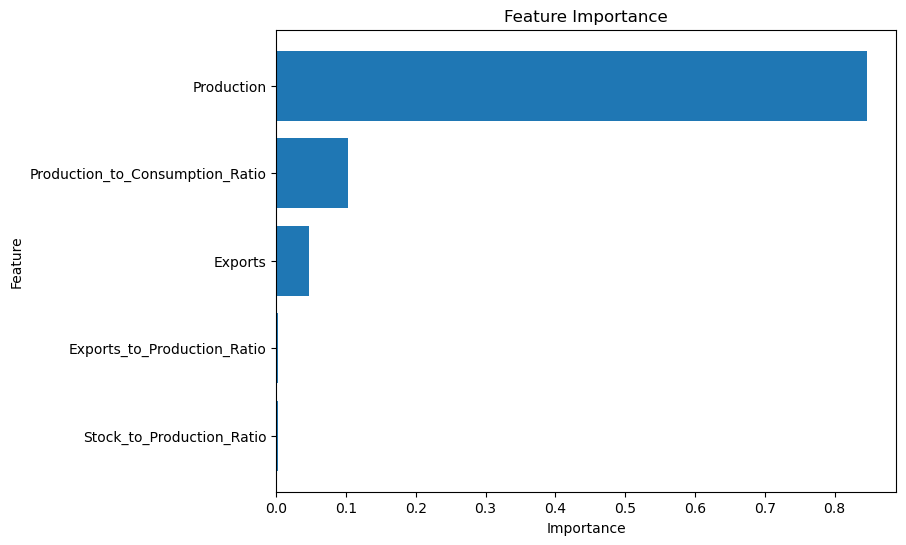

In [ ]:
# Feature importance
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plotting feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


### Feature Importance

| Feature                          | Importance |
|----------------------------------|------------|
| Production                       | 0.845992   |
| Production_to_Consumption_Ratio  | 0.102931   |
| Exports                          | 0.046361   |
| Exports_to_Production_Ratio      | 0.002458   |
| Stock_to_Production_Ratio        | 0.002258   |


# Save and Load the Model

In [66]:
import joblib

# Saving the model
joblib.dump(best_rf_model, 'domestic_consumption_model.pkl')

# Loading the model
loaded_model = joblib.load('domestic_consumption_model.pkl')
